In [113]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [115]:
# read the data

data_df = pd.read_csv(r"Customer_Churn.csv")
data_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [118]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


replacing blanks with 0 as tenure is 0 and no total charges are recorded

In [121]:
data_df["TotalCharges"] = data_df["TotalCharges"].replace(" ","0")
data_df["TotalCharges"] = data_df["TotalCharges"].astype("float")

In [123]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [125]:
data_df.isnull().sum().sum()

0

In [127]:
data_df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [129]:
data_df['customerID'].duplicated().sum()

0

In [132]:
def conv(value):
    if value == 1:
        return "yes"

    else:
        return "no"

data_df["SeniorCitizen"] = data_df["SeniorCitizen"].apply(conv)

converted 0 and 1 values of senior citizen to yes/no to make it easier to understand

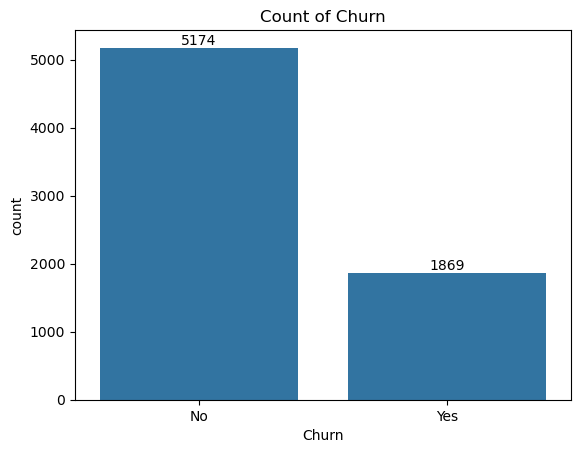

In [135]:
ax = sns.countplot(x ='Churn',data = data_df)
ax.bar_label(ax.containers[0])
plt.title("Count of Churn")
plt.show()

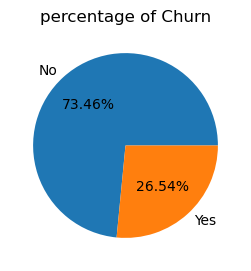

In [136]:
plt.figure(figsize=(5,3))
gb = data_df.groupby("Churn").agg({"Churn":"count"})
plt.pie(gb['Churn'],labels=gb.index,autopct= "%1.2f%%")
plt.title("percentage of Churn")
plt.show()

We can conclude from the pie chart that 26.54% of our customers have churned out.

not let's explore the reason  behind it 

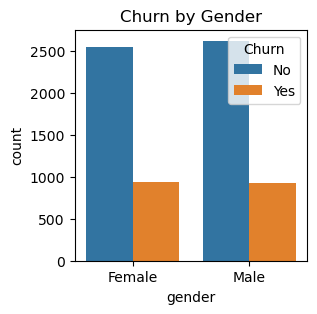

In [139]:
plt.figure(figsize=(3,3))
sns.countplot(x = "gender", data = data_df, hue = 'Churn')
plt.title("Churn by Gender")
plt.show()

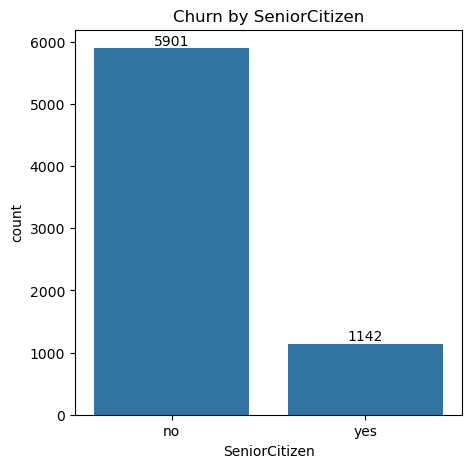

In [141]:
plt.figure(figsize=(5,5))
ax = sns.countplot(x = "SeniorCitizen", data = data_df)
ax.bar_label(ax.containers[0])
plt.title("Churn by SeniorCitizen")
plt.show()

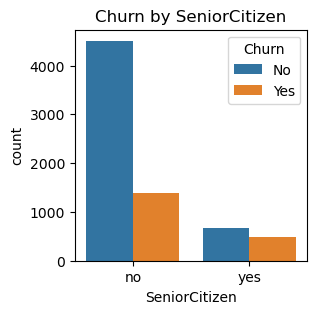

In [142]:
plt.figure(figsize=(3,3))
sns.countplot(x = "SeniorCitizen", data = data_df, hue = 'Churn')
plt.title("Churn by SeniorCitizen")
plt.show()

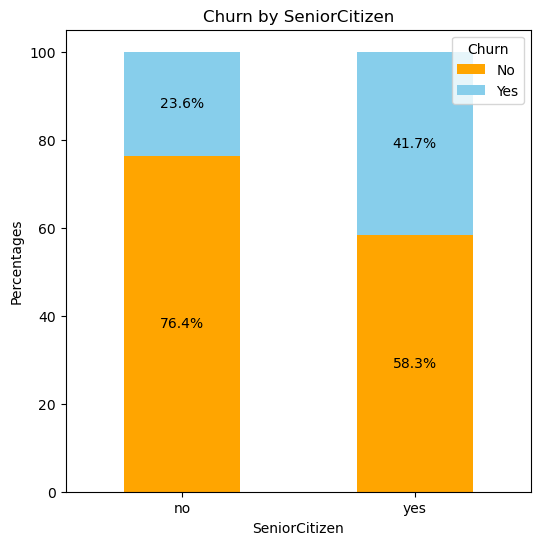

In [145]:
total_counts = data_df.groupby("SeniorCitizen")["Churn"].value_counts(normalize=True).unstack() * 100

fig, ax = plt.subplots(figsize=(6, 6))

total_counts.plot(kind='bar', stacked=True, ax=ax, color=["orange", "skyblue"])

# Add annotations
for bar in ax.patches:
    width = bar.get_width()
    height = bar.get_height()
    x = bar.get_x()
    y = bar.get_y()
    ax.text(x + width / 2, y + height / 2, f'{height:.1f}%', ha='center', va='center')

plt.title("Churn by SeniorCitizen")
plt.xlabel("SeniorCitizen")
plt.ylabel("Percentages")
plt.xticks(rotation=0)
plt.legend(title="Churn", loc="upper right")
plt.show()




In [146]:
# comparative a greated pecentage of people in senior citizen category have churned 

people who have used our servvices for a long time have stayed and people who have used our sevices. 1 or 2 months have churned

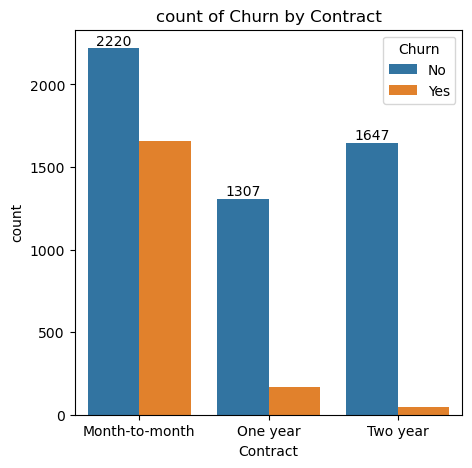

In [149]:

plt.figure(figsize=(5,5))
ax = sns.countplot(x = "Contract", data = data_df, hue = "Churn")
ax.bar_label(ax.containers[0])
plt.title("count of Churn by Contract")
plt.show()

People with a month-to-month contract are more likely to churn than those with a one-year or two-year contract.

In [152]:
data_df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

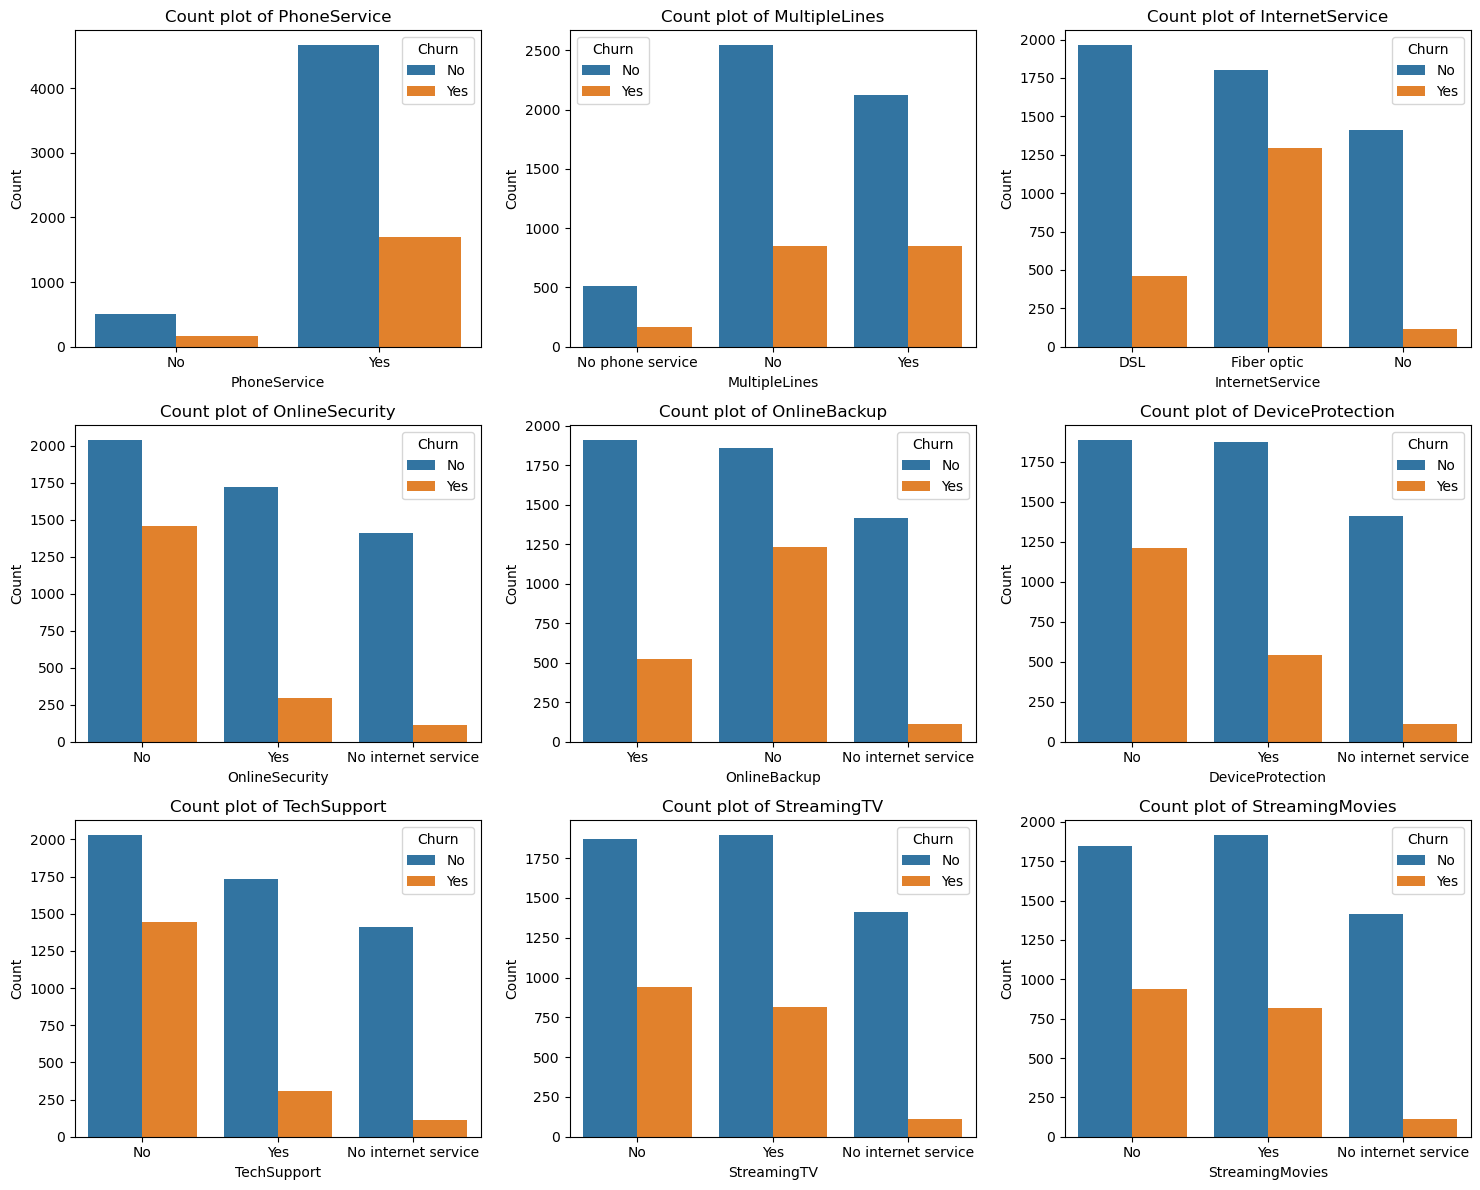

In [153]:

columns = ['PhoneService', 'MultipleLines', 'InternetService',
           'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
           'TechSupport', 'StreamingTV', 'StreamingMovies']

n_cols = 3
n_rows = (len(columns) + n_cols - 1) // n_cols
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4))
axes = axes.flatten()

for i, col in enumerate(columns):
    sns.countplot(x=col, data=data_df, ax=axes[i], hue = data_df['Churn'])
    axes[i].set_title(f"Count plot of {col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Count")

for j in range(len(columns), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


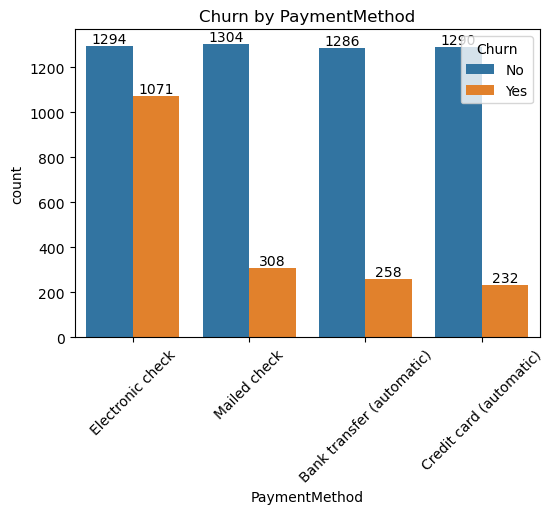

In [163]:
plt.figure(figsize=(6,4))
ax = sns.countplot(x = "PaymentMethod", data = data_df, hue = "Churn")
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title("Churn by PaymentMethod")
plt.xticks(rotation = 45)
plt.show()

customer is likely to churn when he isnmi using electronic check as a payment method